<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB2/blob/main/6351071043_LAB2_Bai5(Trang26_27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Thành Luân - 6351071043

5a. Tải dữ liệu và Tiền xử lý

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
           'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
           'max_heart_rate_achieved', 'exercise_induced_angina',
           'st_depression', 'st_slope', 'num_major_vessels',
           'thalassemia', 'target']

print("Đang đọc dữ liệu 'heart.csv'...")
data = pd.read_csv('heart.csv', names=columns, header=0)

print("Kích thước ban đầu:", data.shape)

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

data = data.apply(pd.to_numeric)

data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

print("Kích thước sau khi làm sạch:", data.shape)
print("\nThông tin dữ liệu:")
data.info()

print("\nPhân bố nhãn (0: Không bệnh, 1: Có bệnh):")
print(data['target'].value_counts())

Đang đọc dữ liệu 'heart.csv'...
Kích thước ban đầu: (303, 14)
Kích thước sau khi làm sạch: (303, 14)

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia  

3. Khảo sát độ tương đồng Pearson

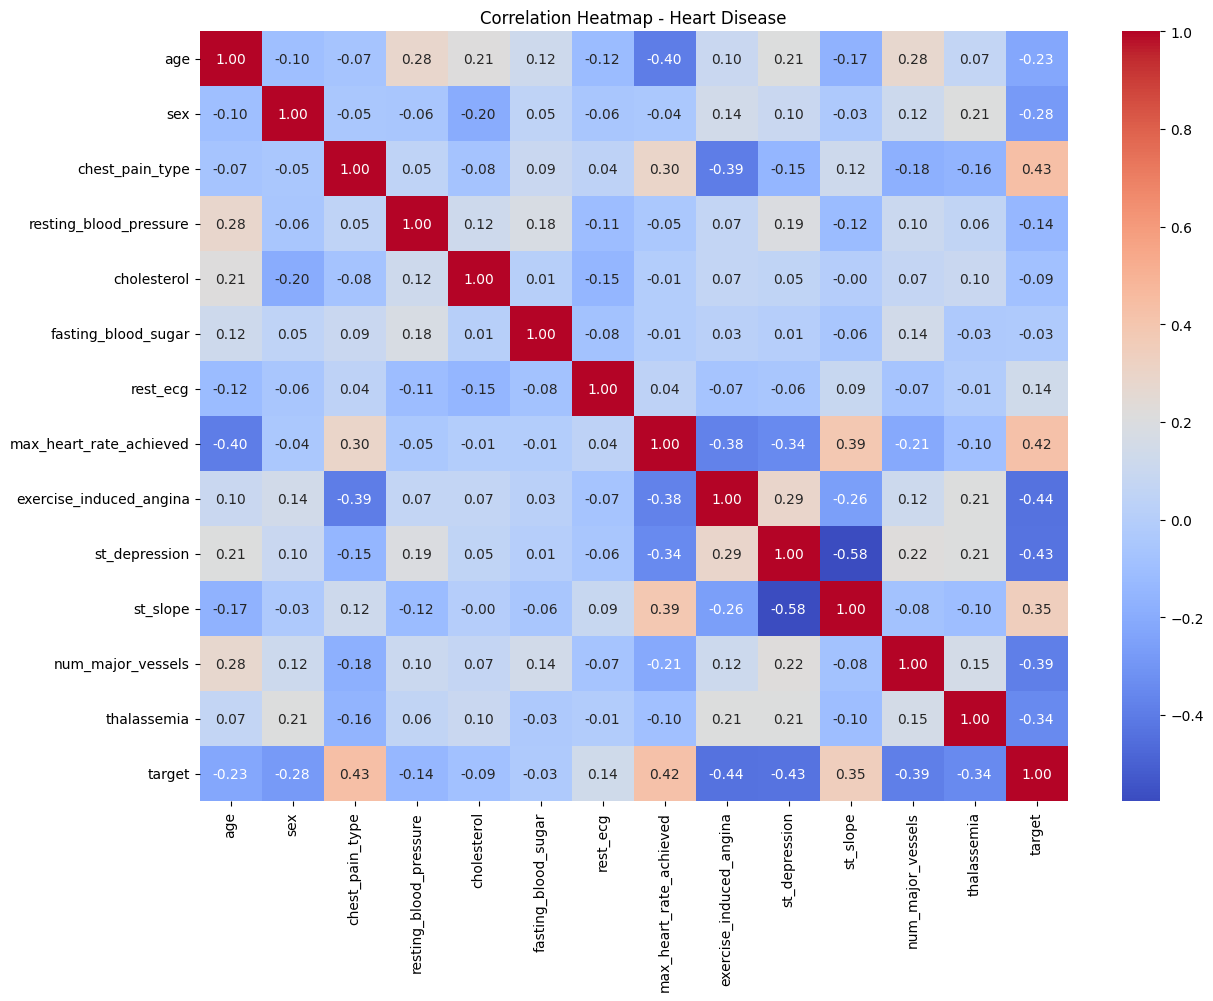

Nguyễn Thành Luân - 6351071043


In [4]:
plt.figure(figsize=(14, 10))

correlation_matrix = data.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap - Heart Disease")
plt.show()
print("Nguyễn Thành Luân - 6351071043")

Câu 4 và 6: Chia tập Train/Test

Tách dữ liệu và chia theo tỷ lệ 70/30

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Nguyễn Thành Luân - 6351071043")
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)

Nguyễn Thành Luân - 6351071043
Kích thước tập huấn luyện: (212, 13)
Kích thước tập kiểm thử: (91, 13)


7. Cây quyết định ID3

Sử dụng criterion='entropy'.

Nguyễn Thành Luân - 6351071043
Accuracy (ID3): 0.6923076923076923

Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.67        41
           1       0.74      0.68      0.71        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91

Nguyễn Thành Luân - 6351071043


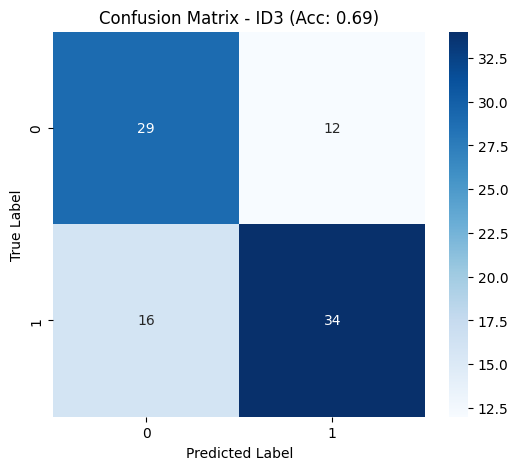

Nguyễn Thành Luân - 6351071043


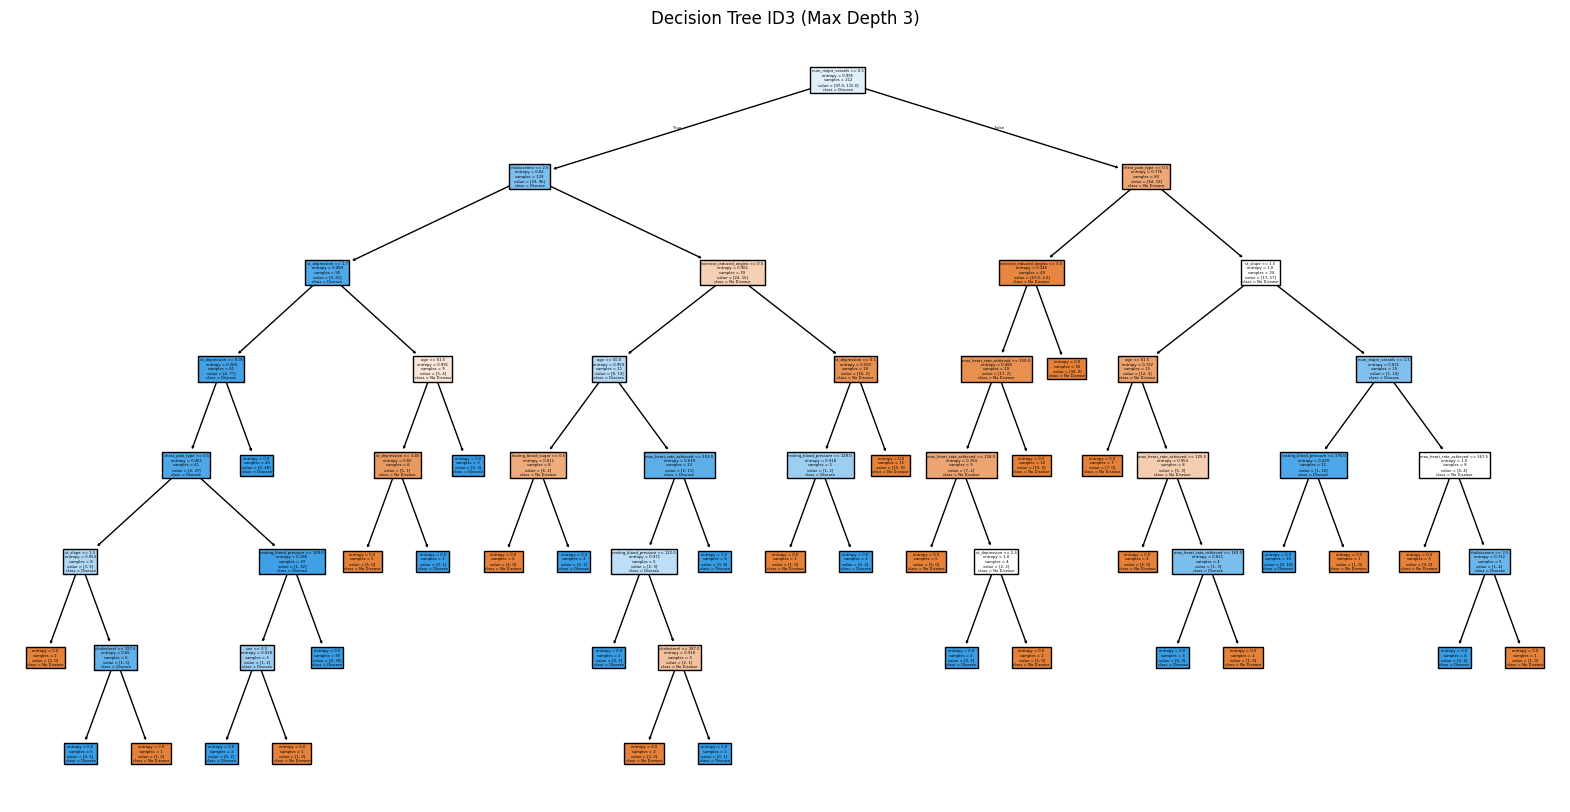

In [6]:
from sklearn import tree
from sklearn import metrics

clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_id3.fit(X_train, y_train)

id3_pred = clf_id3.predict(X_test)

id3_score = metrics.accuracy_score(y_test, id3_pred)
print("Nguyễn Thành Luân - 6351071043")
print("Accuracy (ID3):", id3_score)
print("\nReport:\n", metrics.classification_report(y_test, id3_pred))

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, id3_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - ID3 (Acc: {id3_score:.2f})")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_id3, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree ID3")
plt.savefig('heart_tree_id3.png', dpi=100)
plt.show()

8. Cây quyết định CART

Sử dụng criterion='gini'.

Nguyễn Thành Luân - 6351071043
Accuracy (CART): 0.7362637362637363


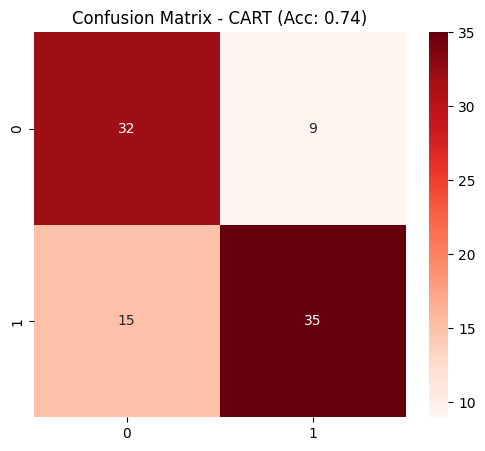

Nguyễn Thành Luân - 6351071043


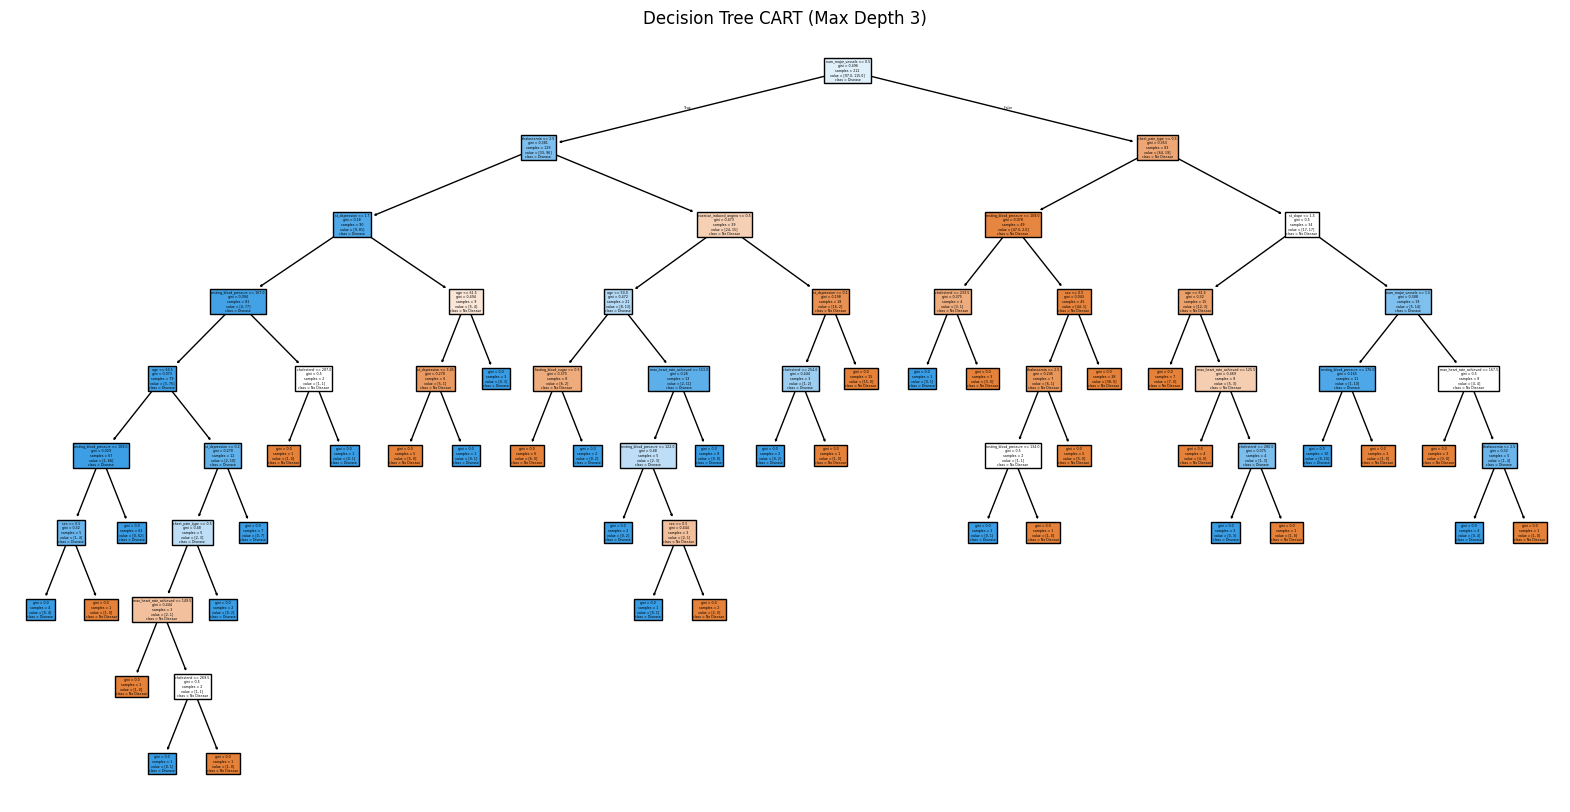

In [11]:
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
clf_cart.fit(X_train, y_train)


cart_pred = clf_cart.predict(X_test)

print("Nguyễn Thành Luân - 6351071043")
cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy (CART):", cart_score)

plt.figure(figsize=(6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, cart_pred), annot=True, fmt="d", cmap="Reds")
plt.title(f"Confusion Matrix - CART (Acc: {cart_score:.2f})")
plt.show()

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_cart, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree CART")
plt.savefig('heart_tree_cart.png', dpi=100)
plt.show()

9. Thuật toán Naïve Bayes

Nguyễn Thành Luân - 6351071043
Accuracy (Naïve Bayes): 0.8351648351648352

Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

Nguyễn Thành Luân - 6351071043


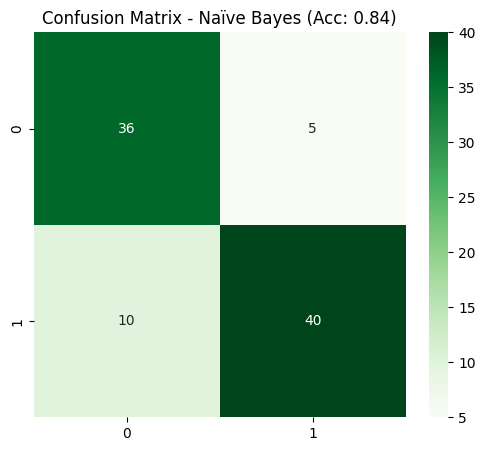

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

bayes_pred = gnb.predict(X_test)

print("Nguyễn Thành Luân - 6351071043")
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy (Naïve Bayes):", bayes_score)
print("\nReport:\n", metrics.classification_report(y_test, bayes_pred))

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(6, 5))
sns.heatmap(metrics.confusion_matrix(y_test, bayes_pred), annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix - Naïve Bayes (Acc: {bayes_score:.2f})")
plt.show()

10. So sánh kết quả

Nguyễn Thành Luân - 6351071043
         Model  Accuracy
0          ID3  0.692308
1         CART  0.736264
2  Naïve Bayes  0.835165


/tmp/ipython-input-2190351159.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


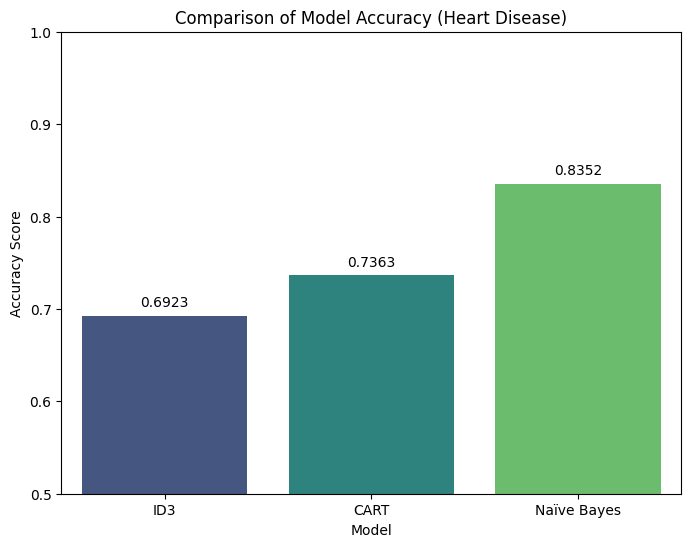

In [9]:
results = pd.DataFrame({
    'Model': ['ID3', 'CART', 'Naïve Bayes'],
    'Accuracy': [id3_score, cart_score, bayes_score]
})

print("Nguyễn Thành Luân - 6351071043")
print(results)

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.ylim(0.5, 1.0)
plt.title('Comparison of Model Accuracy (Heart Disease)')
plt.ylabel('Accuracy Score')
for index, row in results.iterrows():
    plt.text(index, row.Accuracy + 0.01, f"{row.Accuracy:.4f}", color='black', ha="center")
plt.show()